In [2]:
%matplotlib inline
import Astraea
from HeaderP import *
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
plt.rcParams.keys()
plt.rc('font', family='serif')
params = {
   'axes.labelsize': 30,
   'axes.linewidth': 1.5,
   'legend.fontsize': 25,
   'legend.frameon': False,
   'lines.linewidth': 2,
   'xtick.direction': 'in',
   'xtick.labelsize': 25,
   'xtick.major.bottom': True,
   'xtick.major.pad': 10,
   'xtick.major.size': 10,
   'xtick.major.width': 1,
   'xtick.minor.bottom': True,
   'xtick.minor.pad': 3.5,
   'xtick.minor.size': 5,
   'xtick.minor.top': True,
   'xtick.minor.visible': True,
   'xtick.minor.width': 1,
   'xtick.top': True,
   'ytick.direction': 'in',
   'ytick.labelsize': 25,
   'ytick.major.pad': 10,
   'ytick.major.size': 10,
   'ytick.major.width': 1,
   'ytick.minor.pad': 3.5,
   'ytick.minor.size': 5,
   'ytick.minor.visible': True,
   'ytick.minor.width': 1,
   'ytick.right': True,
   'figure.figsize': [10,10], # instead of 4.5, 4.5
   'savefig.format': 'eps',
   }
plt.rcParams.update(params)


    

/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/utils/__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:18: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Iterable
/Users/lucy/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:16: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.ab

In [3]:
df=pd.read_pickle('CannonDR16_cut.pkl')
df



,ID,[Fe/H],T_{eff},Log(g),[Mg/Fe],DP,Dnu,LogAge,[Fe/H]_err,T_{eff}_err,...,X,Y,z,R,Age,Age_err,LogAge_upp,LogAge_low,hi_low,hi_low_line
0,2M05151428+2417349,-0.230144,4681.049413,2.429381,0.124859,65.506386,4.069992,3.678858,0.017014,0.037660,...,-5.268701,0.016080,-0.761193,13.468710,4.773734,2.497832,7885.568194,2889.904140,0,False
1,2M05195482+2350417,-0.449450,4774.993425,2.561868,0.149297,40.086202,5.670519,3.839762,0.016889,0.038136,...,-3.541808,0.071588,-0.472355,11.742026,6.914522,3.538125,11305.296612,4229.045924,0,False
2,2M05225734+2344337,-0.331338,4804.005082,2.486873,0.107181,99.930008,5.684769,3.715229,0.017388,0.040132,...,-4.333349,0.123746,-0.538063,12.533960,5.190731,2.712164,8568.743241,3144.415455,0,False
3,2M19441366+4122541,0.120943,4815.302225,2.595823,-0.049038,304.012215,5.183211,3.406383,0.011284,0.024198,...,0.401367,-1.530668,0.238412,7.947428,2.549075,1.286976,4142.513262,1568.560403,0,False
4,2M19442813+4119371,-0.069200,4543.619456,2.511935,0.155229,48.615136,5.158795,4.064674,0.013419,0.025851,...,0.725871,-2.763015,0.427044,7.968491,11.605779,5.807719,18785.535081,7170.096535,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
64394,2M15321226+4359404,-0.425543,4728.588523,2.685028,0.305027,104.188622,7.457660,3.946090,0.019652,0.043012,...,0.653896,-1.932184,2.775767,7.789546,8.832638,4.623042,14592.395622,5346.311313,1,True
64395,2M15340150+4317306,-0.265547,4715.377804,2.728611,0.270722,69.679657,8.521639,3.997966,0.021427,0.049209,...,0.608781,-1.674614,2.410794,7.773734,9.953266,5.321391,16607.874742,5965.092063,1,True
64396,2M15343532+4331285,-0.021317,4562.942519,2.424942,0.031869,110.293007,3.087101,3.916447,0.010866,0.020503,...,0.158439,-0.444087,0.634419,8.053814,8.249871,4.053534,13245.460990,5138.392562,0,False
64397,2M15345356+4425018,-0.500729,4761.223077,2.695497,0.308284,97.110769,7.536125,3.936926,0.018678,0.043083,...,0.473386,-1.439340,2.019428,7.859533,8.648211,4.501088,14250.516844,5248.339899,1,True


In [24]:

elements_age=['Age','Age_err','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H']
regr, regr_outs = Astraea.RFregressor(df[elements_age], elements_age[2:],
                                      target_var='Age', target_var_err='Age_err', n_estimators=100)


Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 18
Features attempt to train: ['C_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'V_FE', 'MN_FE', 'NI_FE', 'P_FE', 'CR_FE', 'CO_FE', 'M_H']
ID column not found, using index as ID!


/Users/lucy/anaconda3/lib/python3.7/site-packages/Astraea-0.1.0-py3.7.egg/Astraea/Astraea.py:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ID_on]=range(len(df))


64399 stars in dataframe!
64399 total stars used for RF!
51519 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.16384428237554716
Average chi^2 is: 1.1331045990941244
Finished!


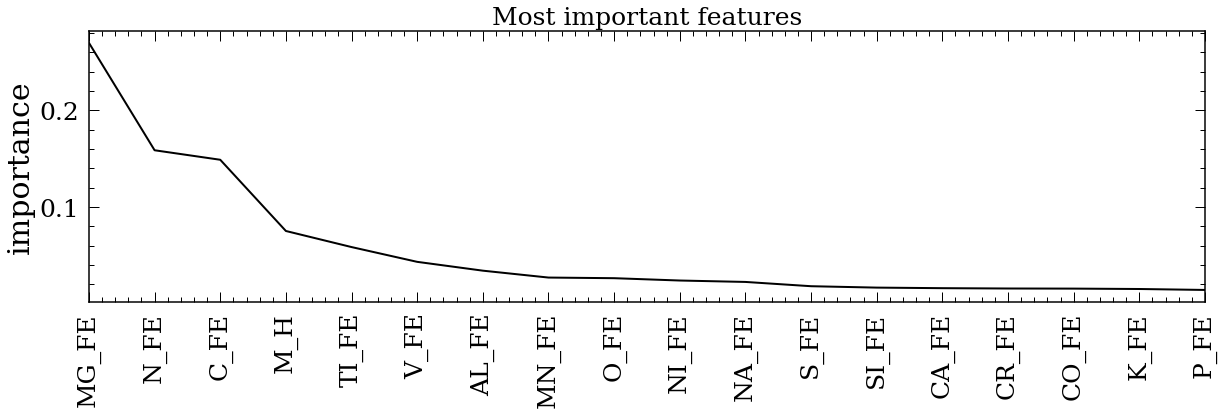

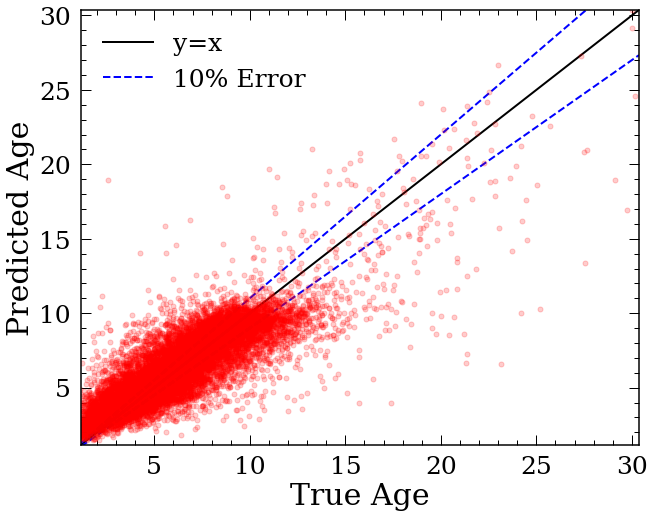

In [25]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

In [14]:
# Add in galactic positions
elements_age=['Age','Age_err','X','Y','z','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE',
              'S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H']

regr, regr_outs = Astraea.RFregressor(df[elements_age], elements_age[2:],
                                      target_var='Age', target_var_err='Age_err', n_estimators=3)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 21
Features attempt to train: ['X', 'Y', 'z', 'C_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'V_FE', 'MN_FE', 'NI_FE', 'P_FE', 'CR_FE', 'CO_FE', 'M_H']
ID column not found, using index as ID!


/Users/lucy/anaconda3/lib/python3.7/site-packages/Astraea-0.1.0-py3.7.egg/Astraea/Astraea.py:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ID_on]=range(len(df))


64399 stars in dataframe!
64399 total stars used for RF!
51519 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.19113280389885384
Average chi^2 is: 1.4977627511923082
Finished!


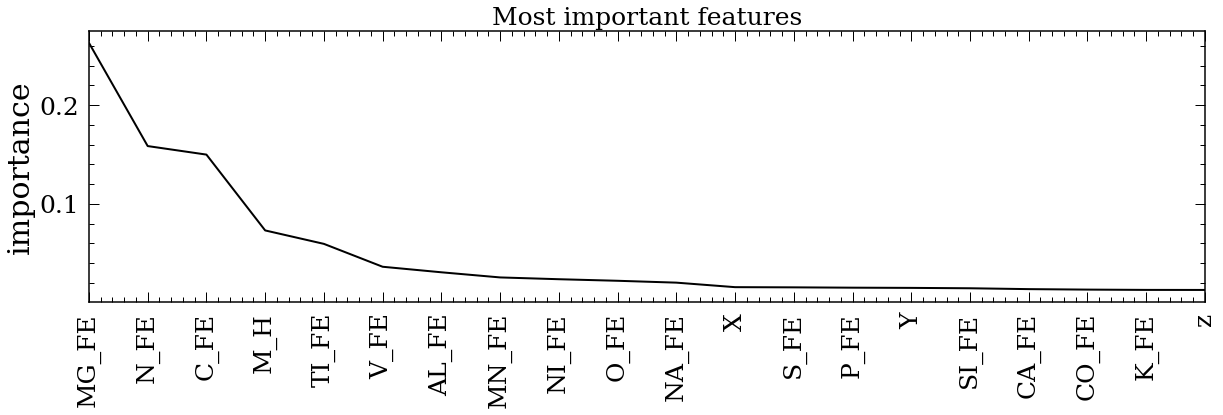

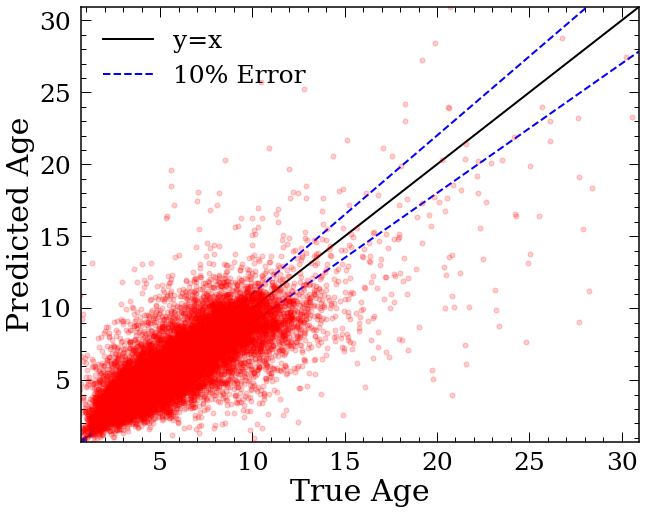

In [15]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

In [16]:
# Add in galactic positions
elements_age=['Age','Age_err','R','z','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE',
              'S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H']

regr, regr_outs = Astraea.RFregressor(df[elements_age], elements_age[2:],
                                      target_var='Age', target_var_err='Age_err', n_estimators=3)




Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 20
Features attempt to train: ['R', 'z', 'C_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'V_FE', 'MN_FE', 'NI_FE', 'P_FE', 'CR_FE', 'CO_FE', 'M_H']
ID column not found, using index as ID!


/Users/lucy/anaconda3/lib/python3.7/site-packages/Astraea-0.1.0-py3.7.egg/Astraea/Astraea.py:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ID_on]=range(len(df))


64399 stars in dataframe!
64399 total stars used for RF!
51519 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.18859312477745213
Average chi^2 is: 1.5474281154583704
Finished!


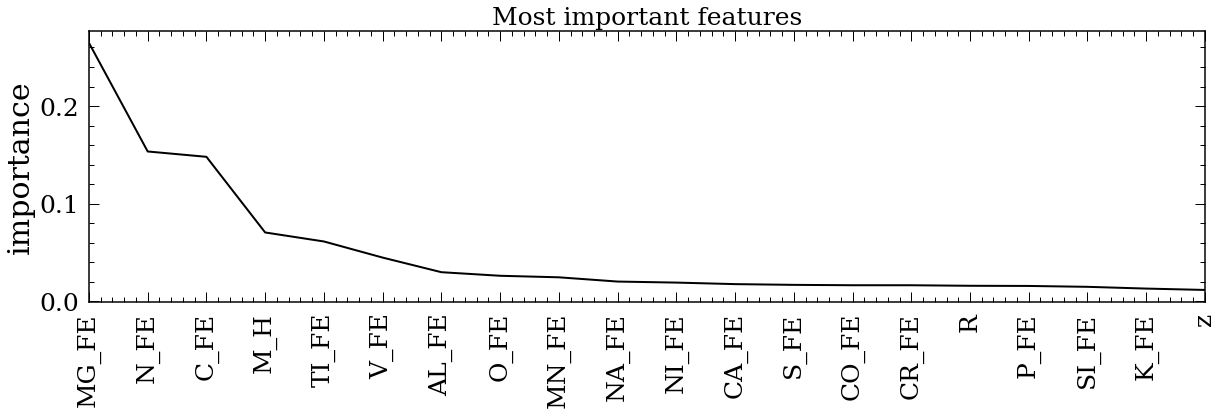

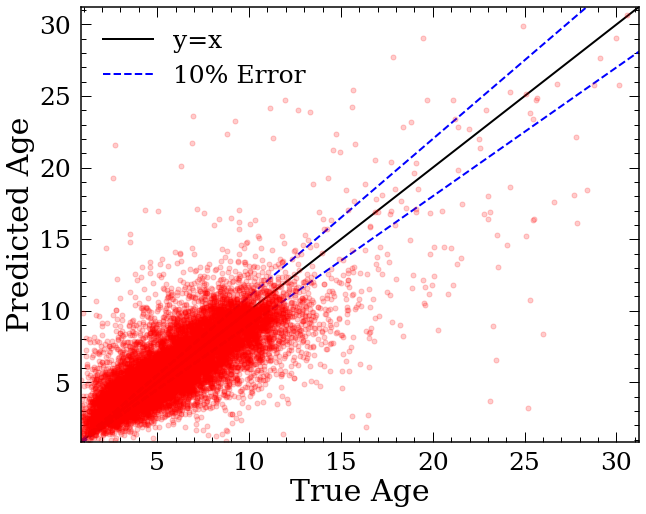

In [17]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

In [18]:
# Add in galactic positions
elements_age=['Age','Age_err','hi_low','X','Y','z','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE',
              'S_FE','K_FE','CA_FE','TI_FE','V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','M_H']

regr, regr_outs = Astraea.RFregressor(df[elements_age], elements_age[2:],
                                      target_var='Age', target_var_err='Age_err', n_estimators=3)





Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 22
Features attempt to train: ['hi_low', 'X', 'Y', 'z', 'C_FE', 'N_FE', 'O_FE', 'NA_FE', 'MG_FE', 'AL_FE', 'SI_FE', 'S_FE', 'K_FE', 'CA_FE', 'TI_FE', 'V_FE', 'MN_FE', 'NI_FE', 'P_FE', 'CR_FE', 'CO_FE', 'M_H']
ID column not found, using index as ID!


/Users/lucy/anaconda3/lib/python3.7/site-packages/Astraea-0.1.0-py3.7.egg/Astraea/Astraea.py:589: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[ID_on]=range(len(df))


64399 stars in dataframe!
64399 total stars used for RF!
51519 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.19052904026823653
Average chi^2 is: 1.4662817375296795
Finished!


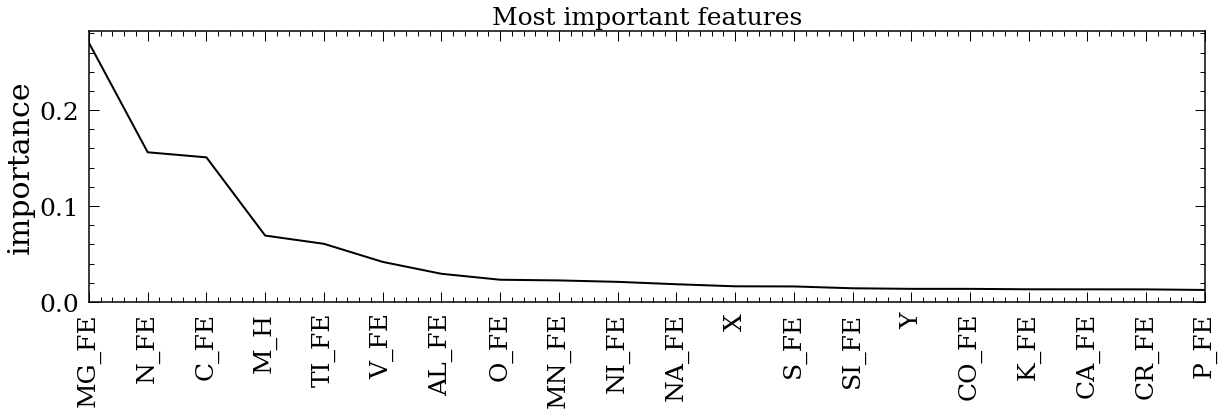

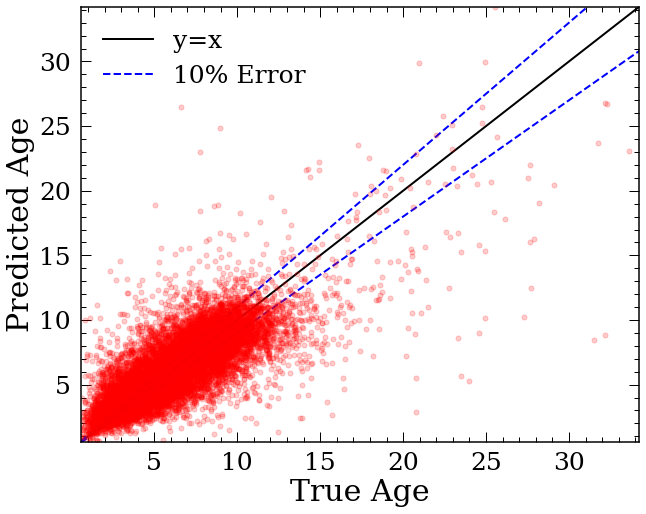

In [19]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

Test shows, you can predict ages with element abundances (mostly Mg, N, C, Fe, Ti, V, Al, O, Mn...) and it doesn't depend on location or whether it is high or low alpha disk or not.

In [26]:
traincolumns=[i for i in df.columns if "Age" not in i]
regr, regr_outs = Astraea.RFregressor(df, traincolumns,target_var='Age', 
                                      target_var_err='Age_err', n_estimators=100)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 222
Features attempt to train: ['ID', '[Fe/H]', 'T_{eff}', 'Log(g)', '[Mg/Fe]', 'DP', 'Dnu', '[Fe/H]_err', 'T_{eff}_err', 'Log(g)_err', '[Mg/Fe]_err', 'DP_err', 'Dnu_err', 'chisq', 'APSTAR_ID', 'TARGET_ID', 'ASPCAP_ID', 'FILE', 'APOGEE_ID', 'TELESCOPE', 'LOCATION_ID', 'FIELD', 'J', 'J_ERR', 'H', 'H_ERR', 'K', 'K_ERR', 'RA', 'DEC', 'GLON', 'GLAT', 'APOGEE_TARGET1', 'APOGEE_TARGET2', 'APOGEE_TARGET3', 'APOGEE2_TARGET1', 'APOGEE2_TARGET2', 'APOGEE2_TARGET3', 'TARGFLAGS', 'SURVEY', 'PROGRAMNAME', 'NVISITS', 'COMBTYPE', 'COMMISS', 'SNR', 'STARFLAG', 'STARFLAGS', 'ANDFLAG', 'ANDFLAGS', 'VHELIO_AVG', 'VSCATTER', 'VERR', 'VERR_MED', 'OBSVHELIO_AVG', 'OBSVSCATTER', 'OBSVERR', 'OBSVERR_MED', 'SYNTHVHELIO_AVG', 'SYNTHVSCATTER', 'SYNTHVERR', 'SYNTHVERR_MED', 'RV_TEFF', 'RV_LOGG', 'RV_FEH', 'RV_ALPHA', 'RV_CARB', 'RV_CCFWHM', 'RV_AUTOFWHM', 'SYNTHSCATTER', 'MEANFIB', 'SIGF

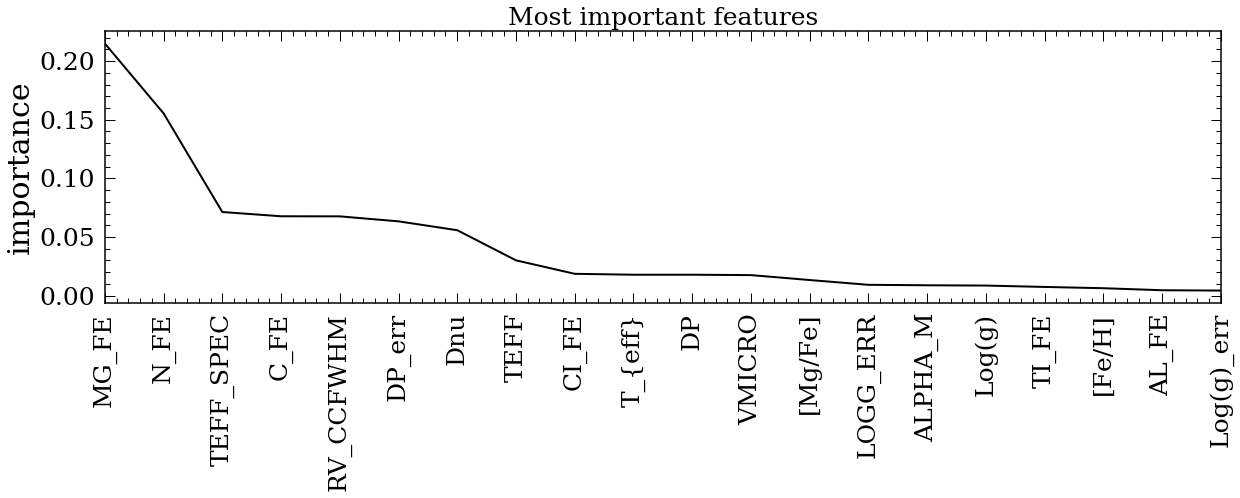

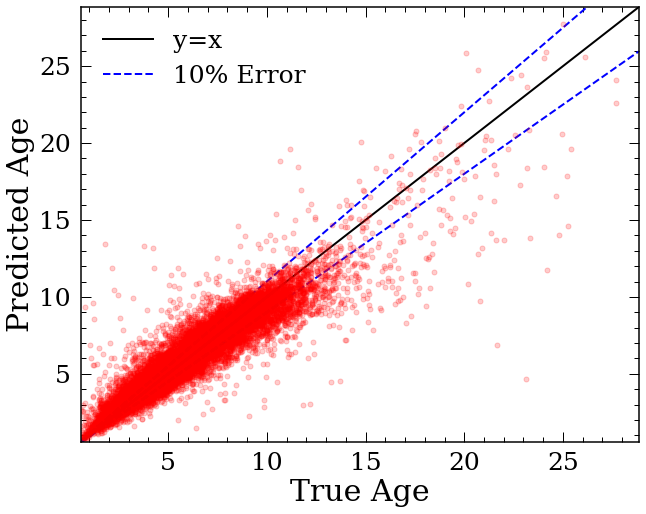

In [28]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

In [37]:
__, Ftrains=zip(*sorted(zip(regr_outs['importance'],regr_outs['actrualF'])))

In [10]:
"""
Ftrains=['Log(g)_err','AL_FE','TI_FE','Log(g)','ALPHA_M','CI_FE','RV_CCFWHM',
    'C_FE','TEFF_SPEC','N_FE','MG_FE']
"""
Ftrains=['AL_FE','TI_FE','Log(g)','ALPHA_M','RV_CCFWHM',
    'C_FE','TEFF_SPEC','N_FE','MG_FE','ra','dec','parallax','pmra','pmdec','l','b','radius_val','r_est']

df=df.loc[abs(df['CI_FE'])<1]
df=df.loc[df['Age']<20]
print(len(df))

3476


In [14]:
3476-59

3417

In [11]:
regr, regr_outs = Astraea.RFregressor(df, Ftrains,target_var='Age', 
                                      target_var_err='Age_err', n_estimators=100)


Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 18
Features attempt to train: ['AL_FE', 'TI_FE', 'Log(g)', 'ALPHA_M', 'RV_CCFWHM', 'C_FE', 'TEFF_SPEC', 'N_FE', 'MG_FE', 'ra', 'dec', 'parallax', 'pmra', 'pmdec', 'l', 'b', 'radius_val', 'r_est']
ID column not found, using index as ID!
3476 stars in dataframe!
Missing 59 stars from null values in data!

3417 total stars used for RF!
2733 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.15478878779881206
Average chi^2 is: 1.8607262593419356
Finished!


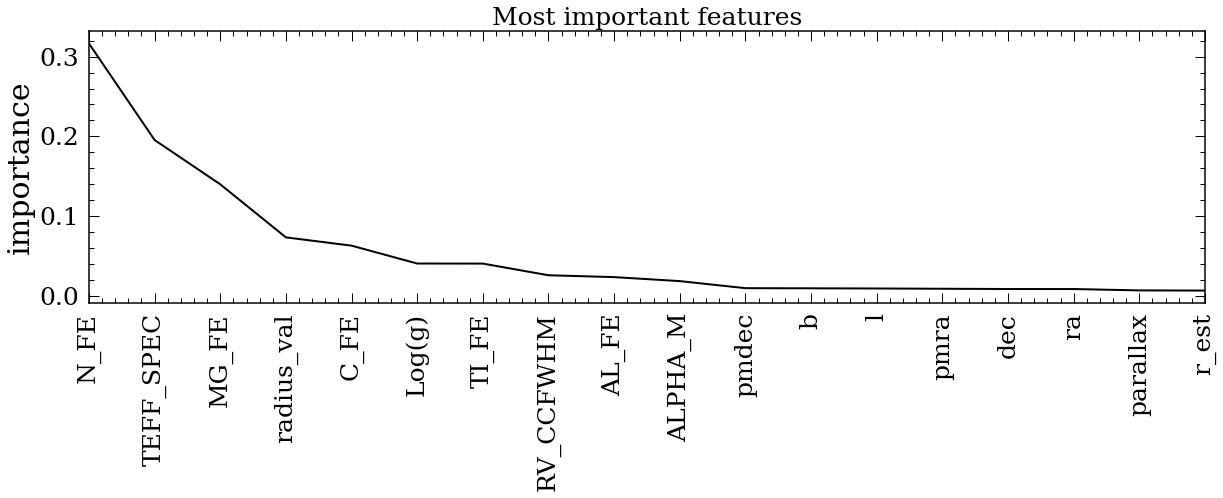

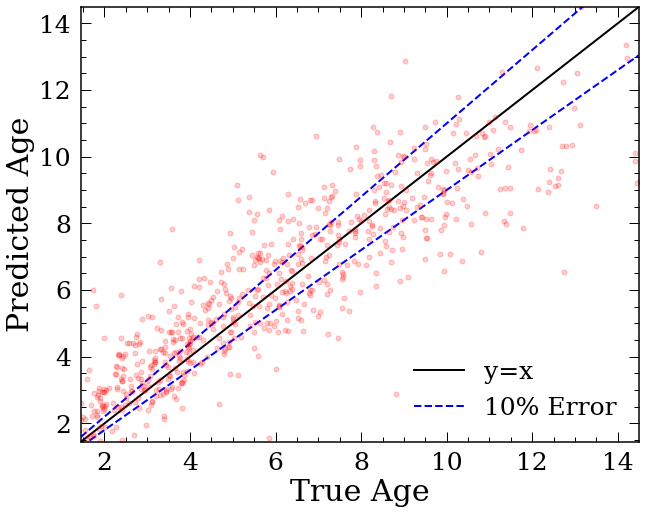

In [13]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)
plt.savefig('Astraea.png')

In [6]:
gaia=pd.read_pickle('gaia.pkl')
df=pd.read_pickle('CannonDR16_cut.pkl')

In [7]:
gaia=gaia[['source_id','ra','dec','parallax','pmra','pmdec','l','b','radius_val','r_est']]

In [8]:
gaia['source_id']

0         2.050234e+18
1         2.050234e+18
2         2.050231e+18
3         2.050231e+18
4         2.050232e+18
              ...     
201307    2.139330e+18
201308    2.139330e+18
201309    2.139331e+18
201310    2.139329e+18
201311    2.139329e+18
Name: source_id, Length: 201312, dtype: float64

In [9]:
df=pd.merge(df,gaia,left_on='GAIA_SOURCE_ID',right_on='source_id',how='inner')

Text(0, 0.5, 'radius_val')

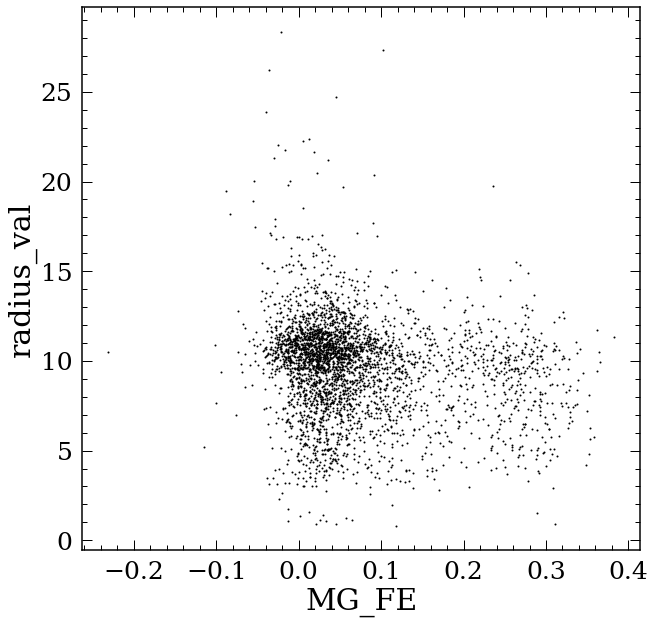

In [207]:
plt.scatter(df['MG_FE'],df['radius_val'],s=1,c='k')
plt.xlabel('MG_FE')
plt.ylabel('radius_val')

In [208]:
df=df.dropna(subset=['radius_val'])
regr, regr_outs = Astraea.RFregressor(df, ['MG_FE','C_FE','N_FE','TI_FE','AL_FE'],target_var='radius_val', 
                                      target_var_err='radius_val', n_estimators=100)




Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 5
Features attempt to train: ['MG_FE', 'C_FE', 'N_FE', 'TI_FE', 'AL_FE']
3417 stars in dataframe!
3417 total stars used for RF!
2733 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.12866760334343025
Average chi^2 is: 0.9979874391274522
Finished!


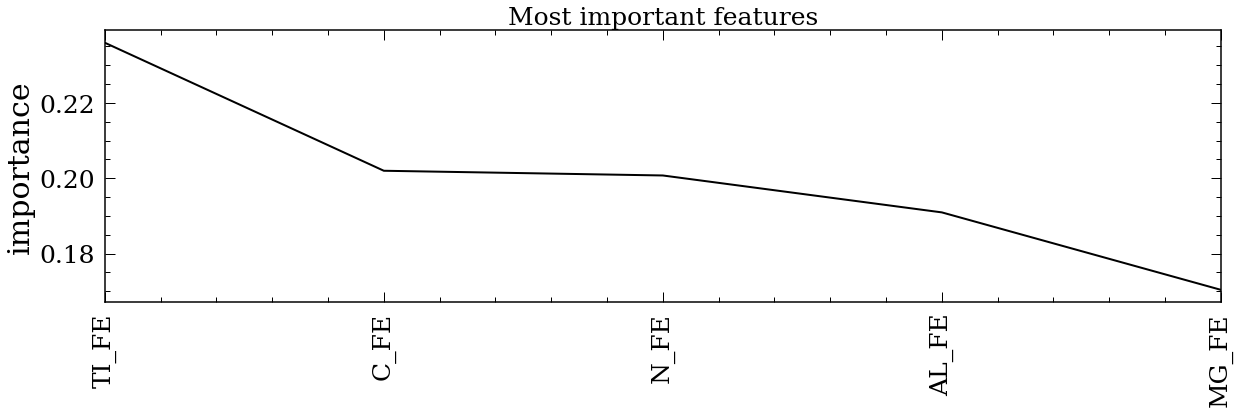

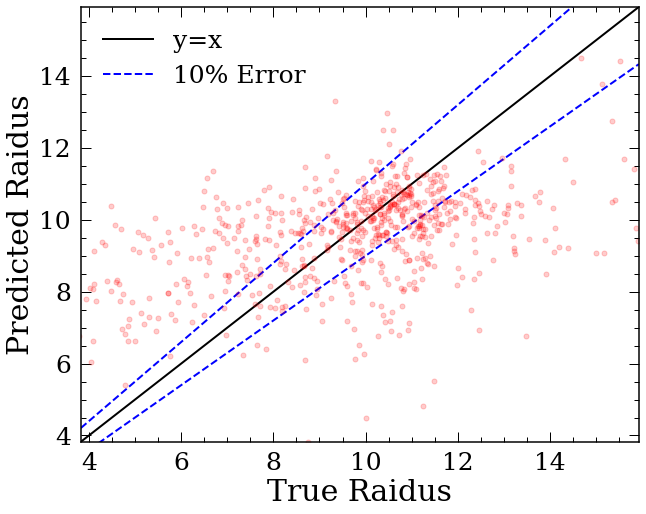

In [210]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Raidus', MS=10)

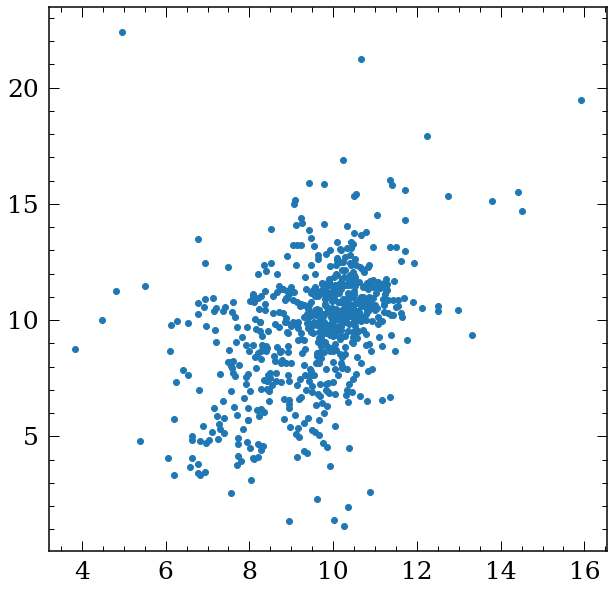

In [212]:
plt.scatter(regr_outs['prediction'],regr_outs['y_test'])

# seperate hi/low alpha disk

In [127]:
#df_hi=df.loc[df['hi_low_line']==1]
#df_low=df.loc[df['hi_low_line']==0]

df_hi=df.loc[df['hi_low']==1]
df_low=df.loc[df['hi_low']==0]

df=df.loc[abs(df['CI_FE'])<1]
df=df.loc[df['Age']<20]
print(len(df))

64067


In [128]:
Ftrains=['AL_FE','TI_FE','Log(g)','ALPHA_M','VMICRO','CI_FE','RV_CCFWHM','C_FE','TEFF_SPEC','N_FE','MG_FE']

In [129]:
#traincolumns=[i for i in df.columns if "Age" not in i]

regr, regr_outs = Astraea.RFregressor(df_hi, Ftrains,target_var='Age', 
                                      target_var_err='Age_err', n_estimators=100)



Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 11
Features attempt to train: ['AL_FE', 'TI_FE', 'Log(g)', 'ALPHA_M', 'VMICRO', 'CI_FE', 'RV_CCFWHM', 'C_FE', 'TEFF_SPEC', 'N_FE', 'MG_FE']
ID column not found, using index as ID!
11780 stars in dataframe!
11780 total stars used for RF!
9424 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.08716664780601219
Average chi^2 is: 0.4651526626044346
Finished!


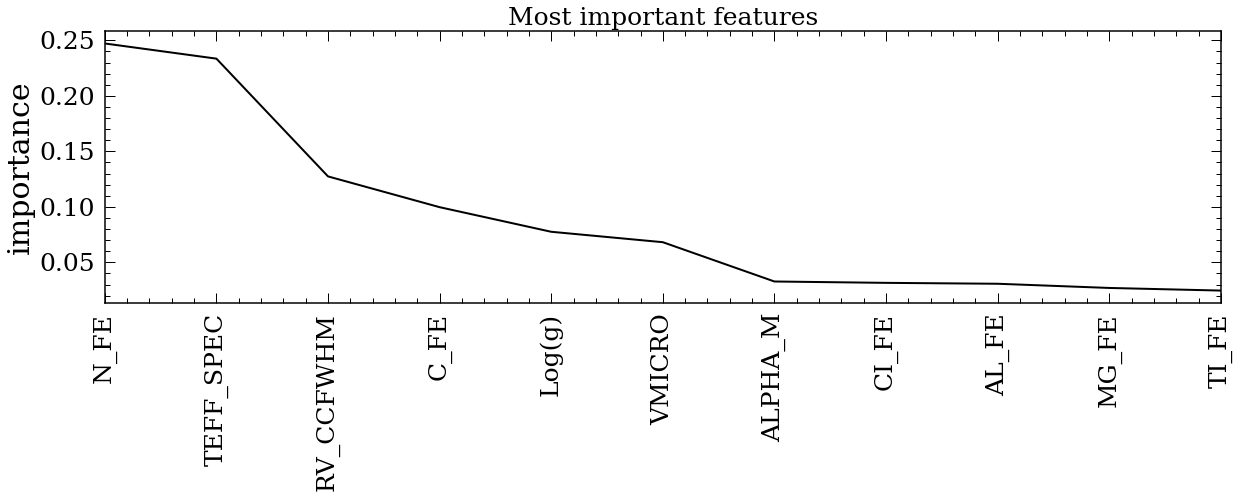

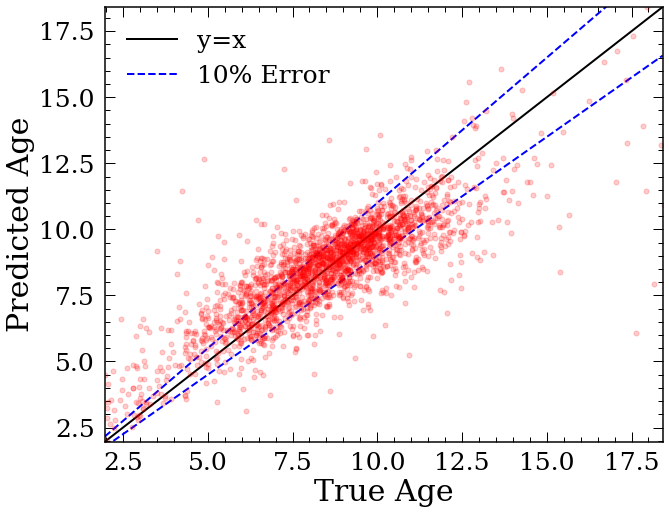

In [130]:
# with clustering
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

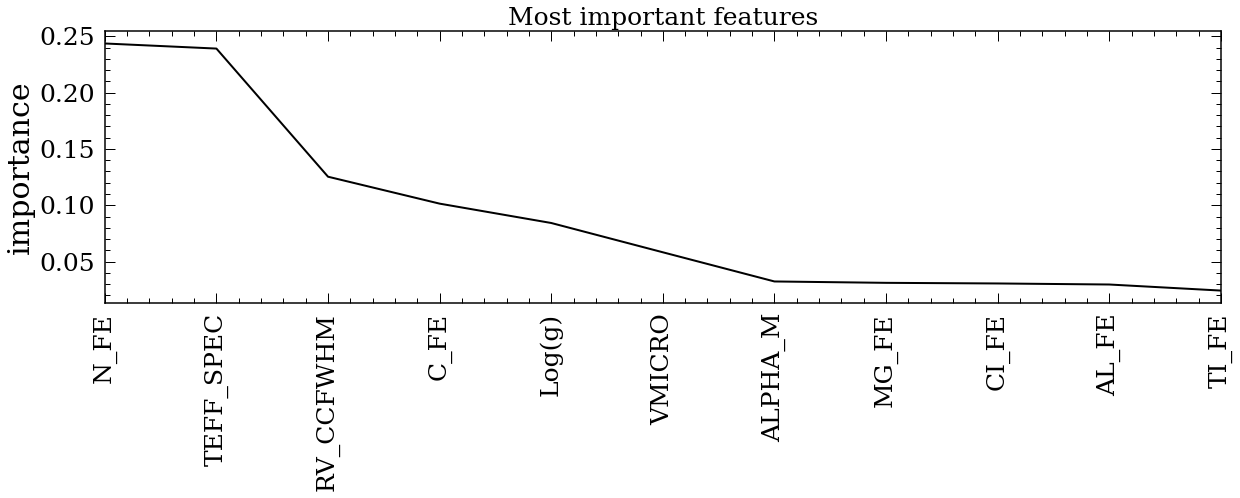

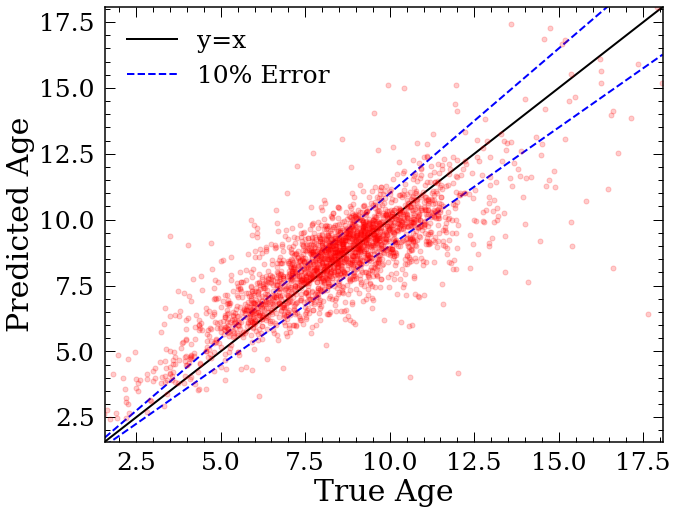

In [117]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

In [131]:
regr, regr_outs = Astraea.RFregressor(df_low, Ftrains,target_var='Age', 
                                      target_var_err='Age_err', n_estimators=100)




Simpliest example:
 regr,regr_outs = RFregressor(df,testF)

Fraction of data used to train: 0.8
# of Features attempt to train: 11
Features attempt to train: ['AL_FE', 'TI_FE', 'Log(g)', 'ALPHA_M', 'VMICRO', 'CI_FE', 'RV_CCFWHM', 'C_FE', 'TEFF_SPEC', 'N_FE', 'MG_FE']
ID column not found, using index as ID!
52287 stars in dataframe!
52287 total stars used for RF!
41829 training stars!
Finished training! Making predictions!
Finished predicting! Calculating statistics!
Median Relative Error is: 0.12748211937864196
Average chi^2 is: 0.6959845723671209
Finished!


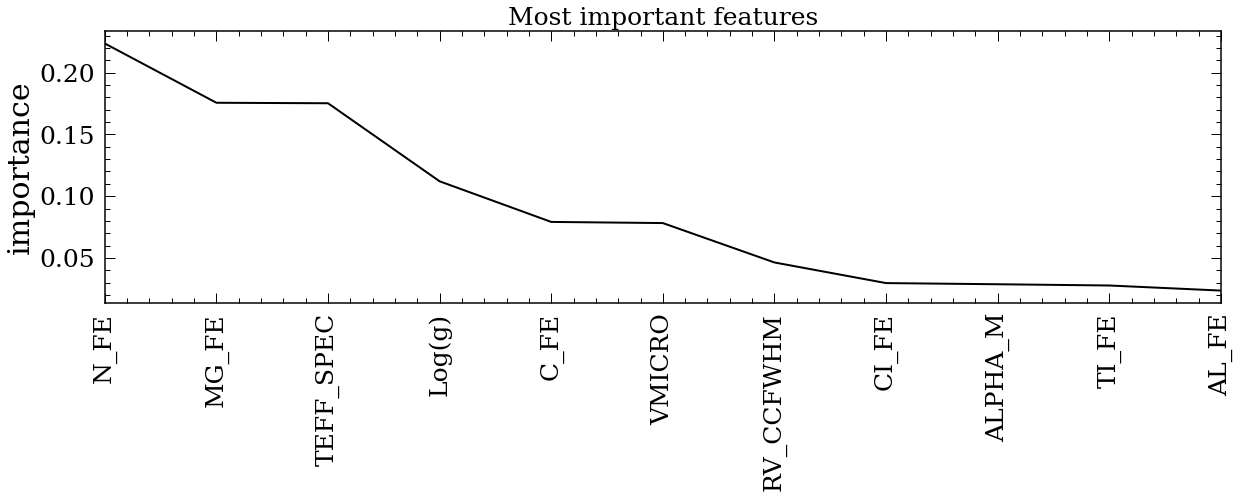

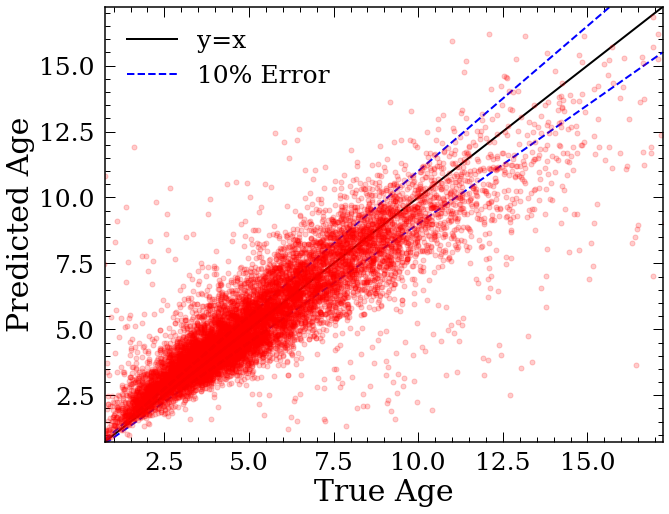

In [132]:
# with clustering
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

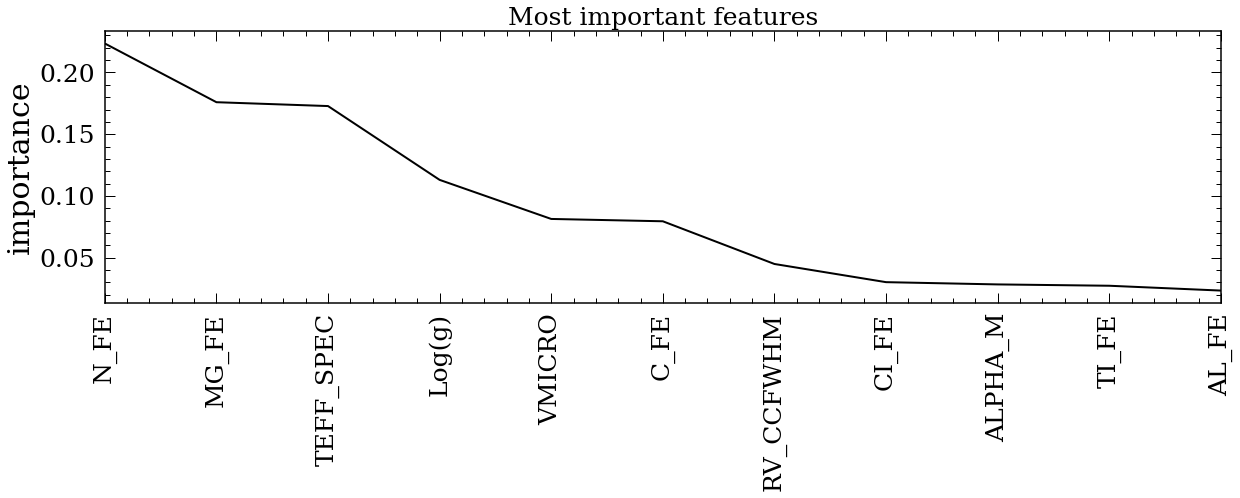

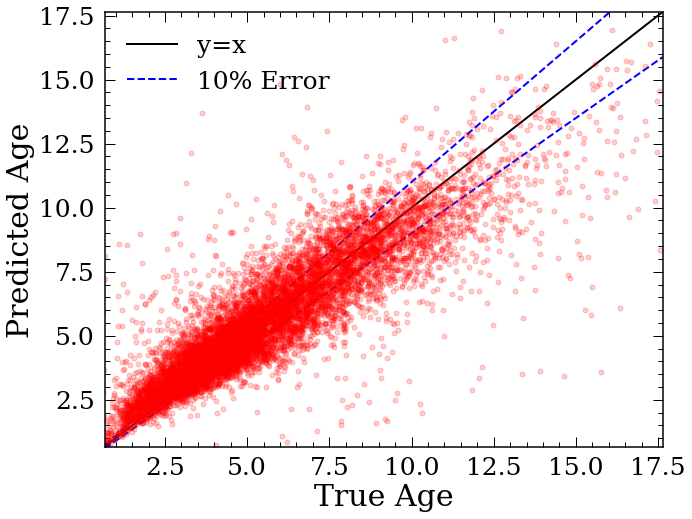

In [119]:
Astraea.plot_result(regr_outs['actrualF'], regr_outs['importance'], regr_outs['prediction'],
                    regr_outs['y_test'], labelName='Age', MS=10)

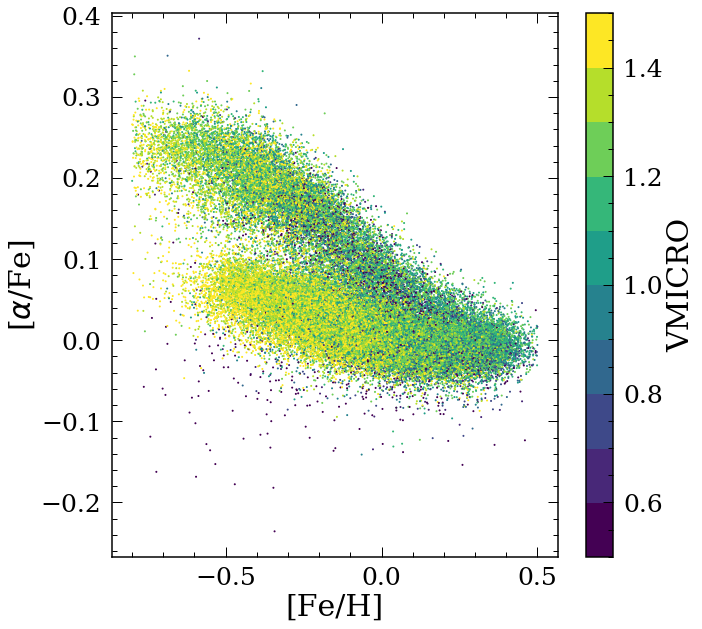

In [103]:
cm = plt.cm.get_cmap('viridis',10)
plt.scatter(df['M_H'],df['ALPHA_M'],c=df['VMICRO'],s=1,vmin=0.5,vmax=1.5,cmap=cm)
plt.xlabel('[Fe/H]')
plt.ylabel('[$\\alpha$/Fe]')
cb=plt.colorbar()
cb.set_label('VMICRO')


(0.25, 2)

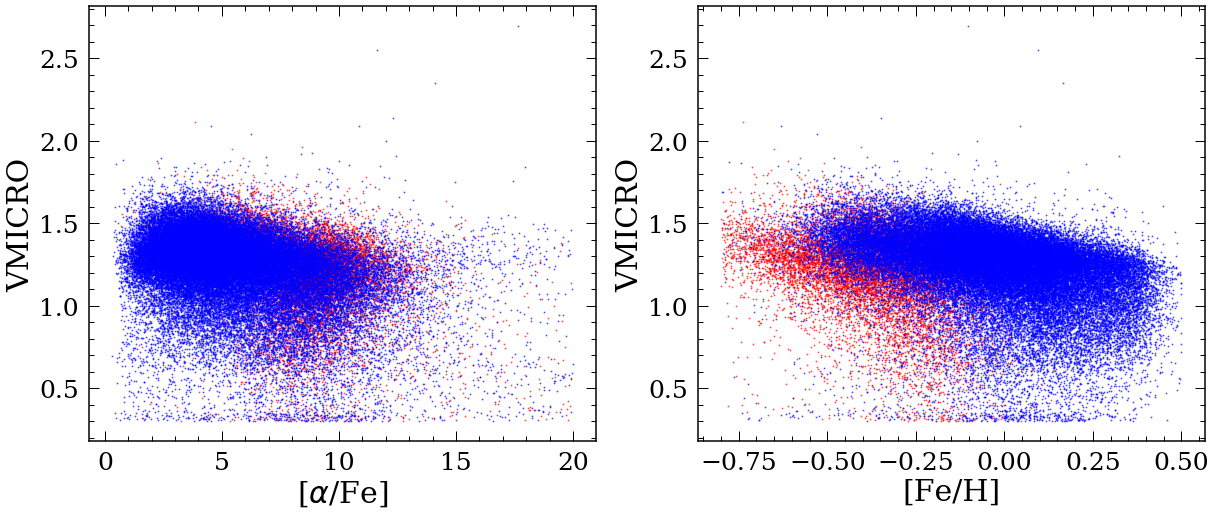

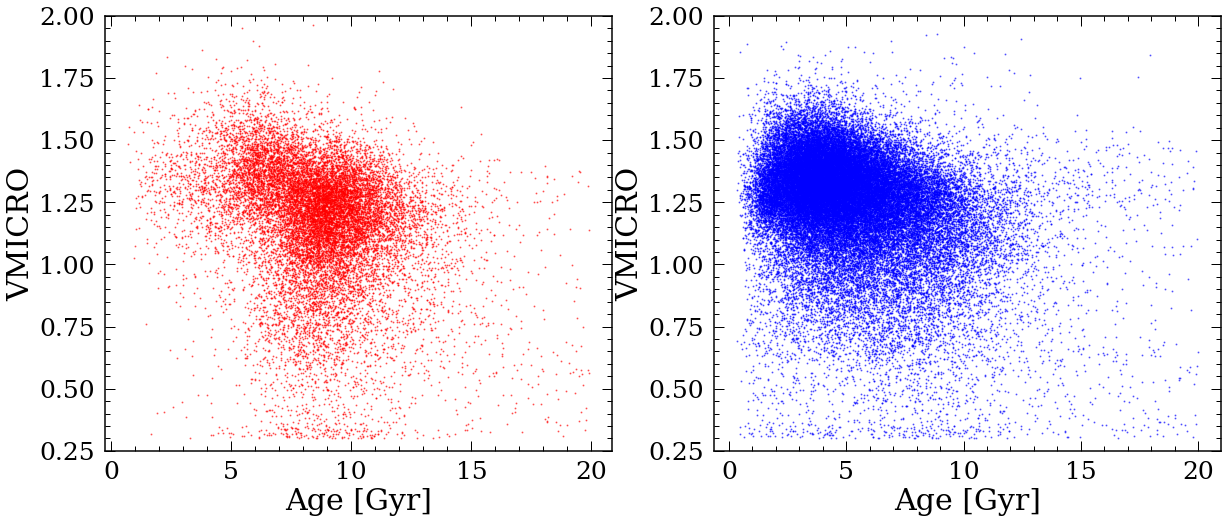

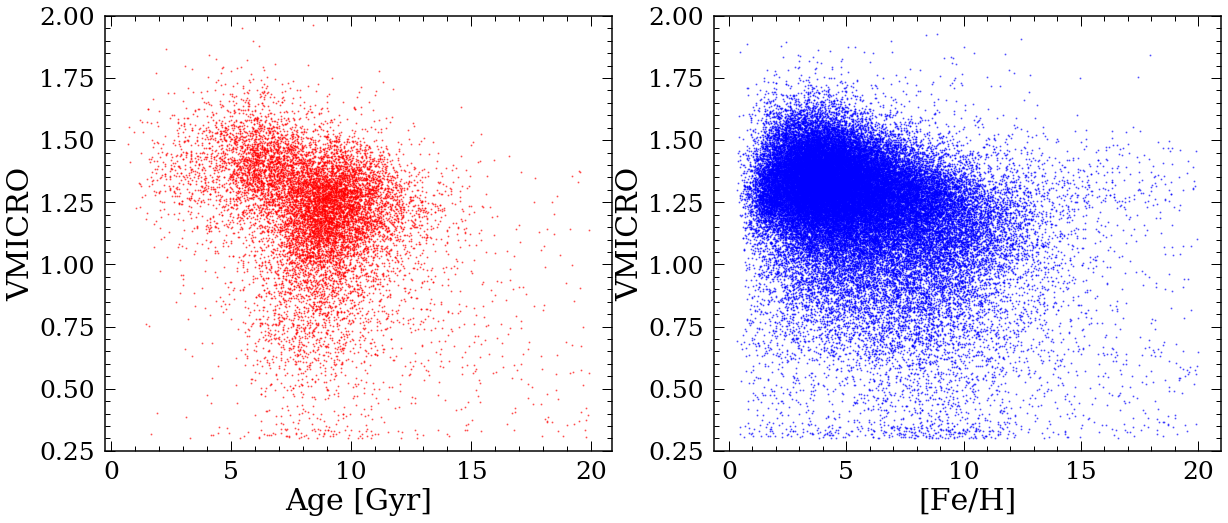

In [126]:
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df_hi['Age'],df_hi['VMICRO'],c='r',s=1,alpha=0.5)
plt.scatter(df_low['Age'],df_low['VMICRO'],c='b',s=1,alpha=0.5)
plt.xlabel('[$\\alpha$/Fe]')
plt.ylabel('VMICRO')
plt.subplot(1,2,2)
plt.scatter(df_hi['M_H'],df_hi['VMICRO'],c='r',s=1,alpha=0.5)
plt.scatter(df_low['M_H'],df_low['VMICRO'],c='b',s=1,alpha=0.5)
plt.xlabel('[Fe/H]')
plt.ylabel('VMICRO')


df_low=df.loc[df['hi_low_line']==0]
df_hi=df.loc[df['hi_low_line']==1]
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df_hi['Age'],df_hi['VMICRO'],c='r',s=1,alpha=0.5)
plt.xlabel('Age [Gyr]')
plt.ylabel('VMICRO')
plt.ylim([0.25,2])

plt.subplot(1,2,2)
plt.scatter(df_low['Age'],df_low['VMICRO'],c='b',s=1,alpha=0.5)
plt.xlabel('Age [Gyr]')
plt.ylabel('VMICRO')
plt.ylim([0.25,2])


df_low=df.loc[df['hi_low']==0]
df_hi=df.loc[df['hi_low']==1]
plt.figure(figsize=(20,8))
plt.subplot(1,2,1)
plt.scatter(df_hi['Age'],df_hi['VMICRO'],c='r',s=1,alpha=0.5)
plt.xlabel('Age [Gyr]')
plt.ylabel('VMICRO')
plt.ylim([0.25,2])

plt.subplot(1,2,2)
plt.scatter(df_low['Age'],df_low['VMICRO'],c='b',s=1,alpha=0.5)
plt.xlabel('[Fe/H]')
plt.ylabel('VMICRO')
plt.ylim([0.25,2])

<Figure size 3600x3600 with 0 Axes>

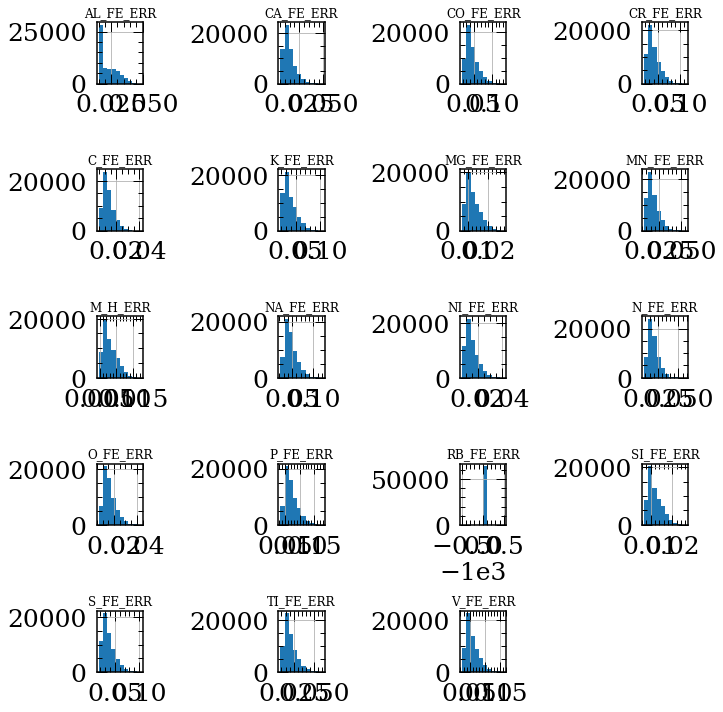

In [124]:
abun_apog=['M_H','C_FE','N_FE','O_FE','NA_FE','MG_FE','AL_FE','SI_FE','S_FE','K_FE','CA_FE','TI_FE',
           'V_FE','MN_FE','NI_FE','P_FE','CR_FE','CO_FE','RB_FE']
abun_apog_err=[i+'_ERR' for i in abun_apog]

df[abun_apog_err].hist()
plt.tight_layout()